# Complex Sentiment Analysis Results
This notebook creates two bar graphs. One displays the counts of the most common positive words and the other the most common negaitive words from a Sentiment Lexicon appearing in a dataset. This allows you to see what positive and negative terms are most likely to influence your sentiment results and to make any adjustments that might be needed to your dataset. The data is pulled from two ".csv" files, one containing the positive words and their counts and the other the negative words and their counts. 

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (ReD)](https://kb.iu.edu/d/apum). You will also need to have access to ReD through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](https://github.com/cyberdh/Text-Analysis/blob/drafts/textPrep-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up ReD, and how to get started using the Jupyter Notebook on ReD.  

### Run CyberDH environment
The code in the cell below points to a Python environment specificaly for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different packages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [1]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download.

In your terminal, packages can be installed by simply typing `pip install nameofpackage --user`. However, since you are using ReD and our Python environment, you will not need to install any of the packages below to use this notebook. Anytime you need to make use of a package, however, you need to import it so that Python knows to look in these packages for any functions or commands you use. Below is a brief description of the packages we are using in this notebook:

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Notice we import some of the packages differently. In some cases we just import the entire package when we say `import XYZ`. For some packages which are small, or, from which we are going to use a lot of the functionality it provides, this is fine. 

Sometimes when we import the package directly we say `import XYZ as X`. All this does is allow us to type `X` instead of `XYZ` when we use certain functions from the package. So we can now say `X.function()` instead of `XYZ.function()`. This saves time typing and eliminates errors from having to type out longer package names. I could just as easily type `import XYZ as potato` and whenever I use a function from the `XYZ` package I would need to type `potato.function()`. What we import the package as is up to you, but some commonly used packages have abbreviations that are standard amongst Python users such as `import pandas as pd` or `import matplotlib.pyplot as plt`. You do not need to us `pd` or `plt`, however, these are widely used and using something else could confuse other users and is generally considered bad practice. 

Other times we import only specific elements or functions from a package. This is common with packages that are very large and provide a lot of functionality, but from which we are only using a couple functions or a specific subset of the package that contains the functionality we need. This is seen when we say `from XYZ import ABC`. This is saying I only want the `ABC` function from the `XYZ` package. Sometimes we need to point to the specific location where a function is located within the package. We do this by adding periods in between the directory names, so it would look like `from XYZ.123.A1B2 import LMN`. This says we want the `LMN` function which is located in the `XYZ` package and then the `123` and `A1B2` directory in that package. 

You can also import more than one function from a package by separating the functions with commas like this `from XYZ import ABC, LMN, QRS`. This imports the `ABC`, `LMN` and `QRS` functions from the `XYZ` package.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### File paths
Here we assign file paths we will need throughout this notebook to variables. This way we only need to make changes here and they will be implemeneted throughout the code. The `homePath` variable uses the `environ` function from the `os` package. This function points to your home directory no matter your operating system (Linux, osX, Windows).

Then we join the `homePath` variable to folders that point to where our ".csv" files are stored and we assign this file path to the variable `dataClean`. The folder names are in quotes and separated by a comma. 

Finally, we use the `homePath` variable and join it with a file path that points to a folder where we can save our output. We assign this file path to a variable called `dataResults`.

You can change any of these to better match your data and your research needs. Just remember to put all folders or file names in quotes and separate them with a comma.

In [3]:
homePath = os.environ['HOME']
dataClean = os.path.join(homePath, 'Text-Analysis-master', 'VADERSentimentAnalysis', 'cleanedData')
dataResults = os.path.join(homePath, 'Text-Analysis-master', 'Output')

### Read in positive words

Now we read in the ".csv" containing the positive words and their frequencies created by the "positiveNegativeWordFreqData" notebook. We do this using the `read_csv` function from the pandas package. Then we convert the ".csv" file to a dataframe and assign the dataframe to the variable `positdf`. However, during this process a column is created that we do not need and causes issues with our bar graph later, so we delete it using `del positdf["Unnamed: 0"]`. Then we take the top 25 words and assign them to the variable `posdf`. This will be what we use in the bar graph below, so if you want to visualize the top 30 words, change the 25 in `posdf = positdf[:25]` to 30. Lastly, we want to do a quick check and make sure our dataframe was created correctly, so we state that we want to see the top 10 words and their frequenies in the dataframe.

In [4]:
pdf = pd.read_csv(os.path.join(dataClean, "posWords.csv"))
positdf = pd.DataFrame(pdf)
del positdf["Unnamed: 0"]
posdf = positdf[:25]
posdf.head(10)

,word,freq
0,like,1133
1,want,720
2,good,487
3,support,475
4,please,474
5,peace,470
6,top,422
7,ly,416
8,well,404
9,dear,393


### Read in negative words

Now we read in the ".csv" containing the negative words and their frequencies created by the "positiveNegativeWordFreqData" notebook. We do this using the `read_csv` function from the pandas package. Then we convert the ".csv" file to a dataframe and assign the dataframe to the variable `negadf`. However, during this process a column is created that we do not need and causes issues with our bar graph later, so we delete it using `del negadf["Unnamed: 0"]`. Then we take the top 25 words and assign them to the variable `negdf`. This will be what we use in the bar graph below, so if you want to visualize the top 30 words, change the 25 in `negdf = negadf[:25]` to 30. Lastly, we want to do a quick check and make sure our dataframe was created correctly, so we state that we want to see the top 10 words and their frequenies in the dataframe.

In [5]:
ndf = pd.read_csv(os.path.join(dataClean, "negWords.csv"))
negadf = pd.DataFrame(ndf)
del negadf["Unnamed: 0"]
negadf = negadf.sort_values('freq', ascending = False)
negdf = negadf[:25]
negdf.head(10)

,word,freq
0,war,3812
1,no,1420
2,attack,1117
3,killing,1012
4,killed,989
5,terrorist,818
6,death,573
7,strike,531
8,attacks,492
9,assassination,465


Now we combine the positive and negative dataframes into one so we can use it later to create the x axis of our graphs. This will let us keep the x axis limit the same for both the positive word graph and the negative word graph.

In [6]:
freqDF = pd.concat([posdf, negdf], ignore_index=True)

###### Plot positive words 

Here we plot the top positive words found in our dataset. The places where changes might need to be made are at the beginning of the cell under `# Variables`. First we name the output file and assign it to the variable `posWordFile`. Make sure to include the file type in the name ('.png', '.jpg', '.svg', et cetera) Then we choose the file format and assign it to the variable `posFmt`, making sure our format matches the file type in our file name. Now we decide on the resolution we want out output file to be and assign it to the variable `posdpi`.

Next we choose the color for the bars in our graph and assign it to the variable `posclr`.

Now, we choose the main title for our graph and assign it to the variable `postitle`.

Then we choose the figure size. The first number is the width and the second is the height. We assign this to the variable `pFigSz`.

Lastly, we choose our font size and assign it to the variable `pFntSz`.

Most everything else in the code should not need to be changed.

Then plot the graph!

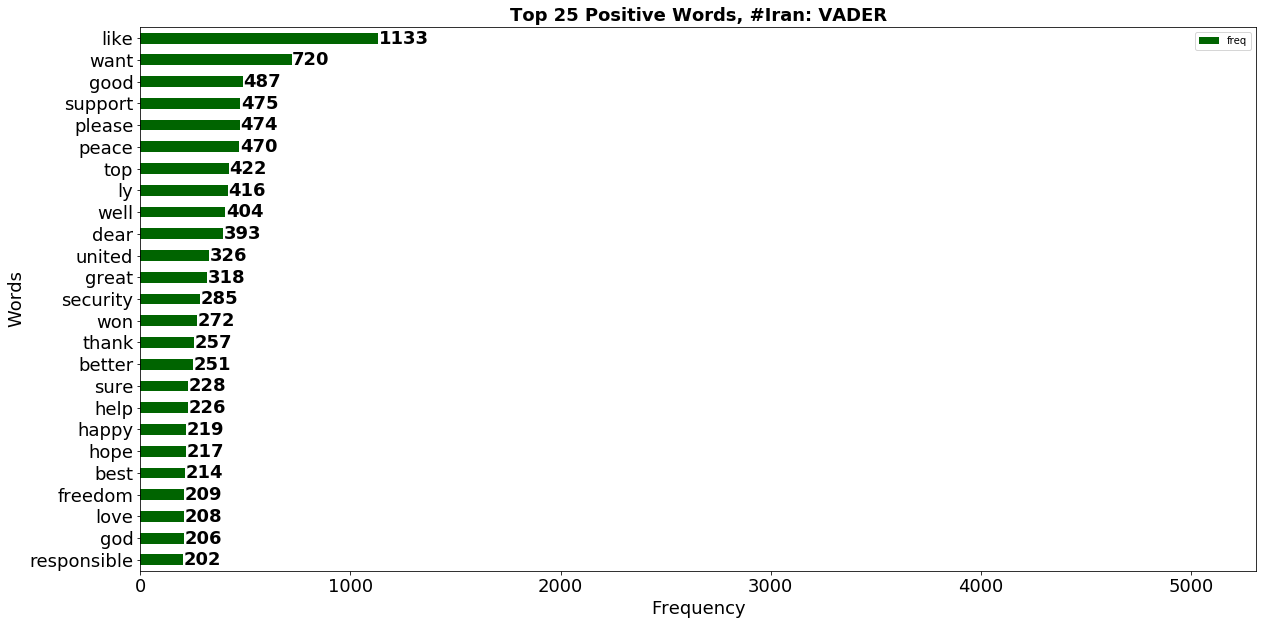

In [7]:
# Variables
posWordFile = "posWordsVader.svg"
posFmt = "svg"
posdpi = 600
posclr = ['darkgreen']
postitle = 'Top 25 Positive Words, #Iran: VADER'
pFigSz = (20,10)
pFntSz = 18

fig = posdf.plot(x= 'word',kind='barh', align='center', color = posclr, figsize = pFigSz, fontsize = pFntSz)
fig.set_ylabel('Words', fontsize = pFntSz)
fig.set_xlabel('Frequency', fontsize = pFntSz)
fig.set_title(postitle, fontweight='bold',fontsize = pFntSz)
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,1500 + max(freqDF['freq']))

for i, v in enumerate(posdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold', fontsize = pFntSz )
    
plt.savefig(os.path.join(dataResults, posWordFile), format= posFmt, dpi=posdpi, bbox_inches='tight',)
plt.show()

###### Plot negative words

Here we plot the top negative words found in our dataset. The places where changes might need to be made are at the beginning of the cell under `# Variables`. First we name the output file and assign it to the variable `negWordFile`. Make sure to include the file type in the name ('.png', '.jpg', '.svg', et cetera) Then we choose the file format and assign it to the variable `negFmt`, making sure our format matches the file type in our file name. Now we decide on the resolution we want our output file to be and assign it to the variable `negdpi`.

Next we choose the color for the bars in our graph and assign it to the variable `negclr`.

Now, we choose the main title for out graph and assign it to the variable `negtitle`.

Then we choose the figure size. The first number is the width and the second is the height. We assign this to the variable `nFigSz`.

Lastly, we choose our font size and assign it to the variable `nFntSz`.

Most everything else in the code should not need to be changed.

Then plot the graph!

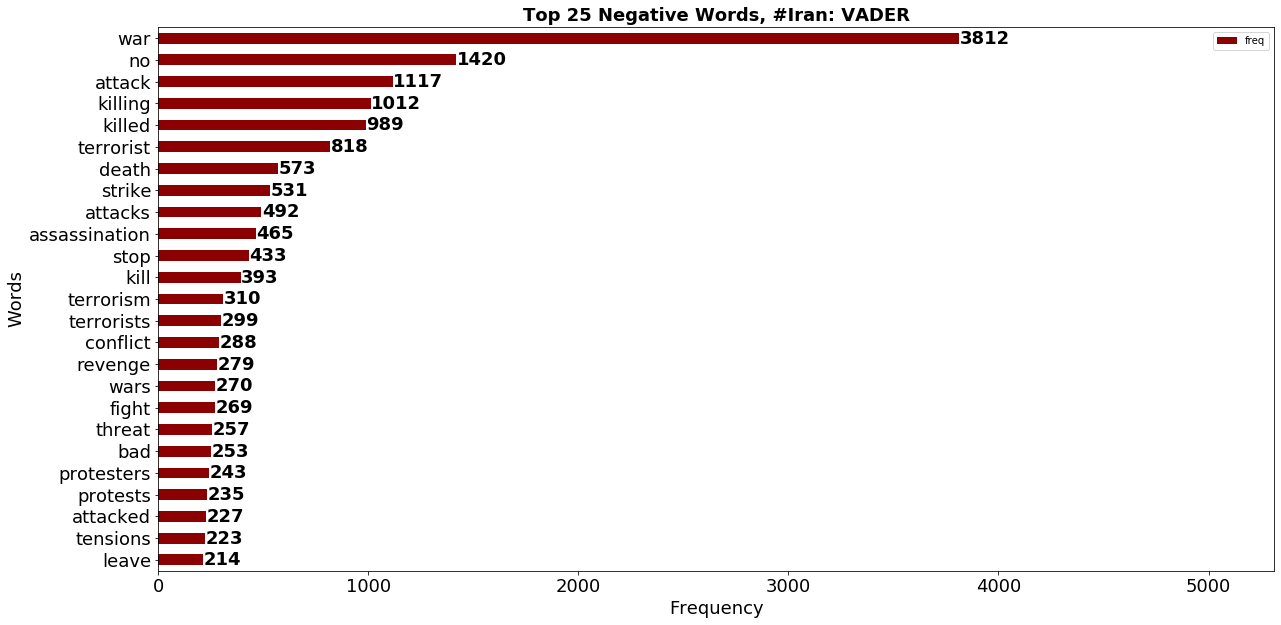

In [8]:
# Variables
negWordFile = "negWordsVader.svg"
negFmt = "svg"
negdpi = 600
negclr = ['darkred']
negtitle = 'Top 25 Negative Words, #Iran: VADER'
nFigSz = (20,10)
nFntSz = 18

# plot

fig = negdf.plot(x= 'word',kind='barh', align='center', color = negclr, figsize = nFigSz, fontsize = nFntSz)
fig.set_ylabel('Words', fontsize = nFntSz)
fig.set_xlabel('Frequency', fontsize = nFntSz)
fig.set_title(negtitle, fontweight = 'bold', fontsize = nFntSz)
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,1500 + max(freqDF['freq']))

for i, v in enumerate(negdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold', fontsize = nFntSz)

    

plt.savefig(os.path.join(dataResults, negWordFile), format=negFmt, dpi=negdpi, bbox_inches='tight',)

plt.show()

## VOILA!!

This code was adapted from Stefan Sinclair's GitHub page called Art of Literary Text Analysis and can be found here: https://github.com/sgsinclair/alta/blob/e908bae2c224578485e10482e812924d7c6b7b05/ipynb/utilities/ComplexSentimentAnalysis.ipynb . Accessed 01/25/2019